In [1]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    warnings.filterwarnings("ignore",category=RuntimeWarning)
    import h5py
    
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/rockyemsn/Project/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/rockyemsn/Project/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
## ARGUMENTS

homeDir = "/Users/rockyemsn/Project/_ComputerVision/DDSM-Mammography"
model_name = "model_s2.0.0.36b.10"

training10_0 = homeDir + '/data/training10_0.tfrecords'
training10_1 = homeDir + '/data/training10_1.tfrecords'
training10_2 = homeDir + '/data/training10_2.tfrecords'
training10_3 = homeDir + '/data/training10_3.tfrecords'
training10_4 = homeDir + '/data/training10_4.tfrecords'


In [3]:
# make sure everything was written properly by reading it back out
def read_and_decode_single_example(filenames):
    filename_queue = tf.train.string_input_producer(filenames, num_epochs=1)
    
    reader = tf.TFRecordReader()
    
    _, serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(
        serialized_example,
        features={
            'label_normal': tf.FixedLenFeature([], tf.int64),
            'image': tf.FixedLenFeature([], tf.string)
        })
    
    # now return the converted data
    label = features['label_normal']
    image = tf.decode_raw(features['image'], tf.uint8)
    image = tf.reshape(image, [299, 299, 1])
    
    return label, image

In [4]:
label, image = read_and_decode_single_example([training10_0,training10_1,training10_2,training10_3,training10_4])

In [5]:
images_batch, labels_batch = tf.train.batch([image, label], batch_size=16, capacity=2000)
global_step = tf.Variable(0, trainable=False)

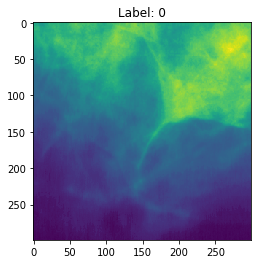

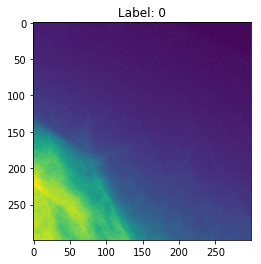

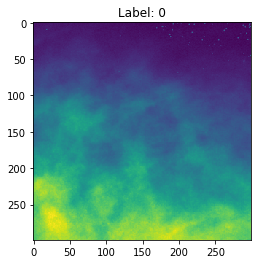

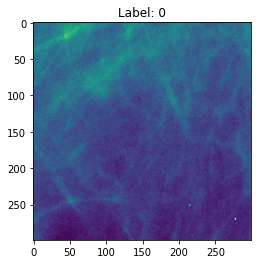

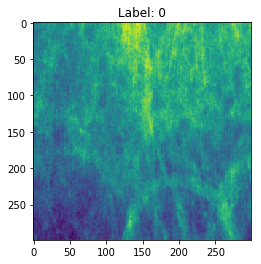

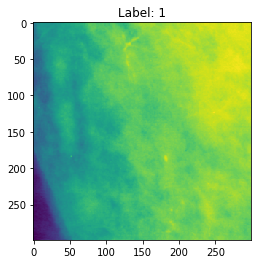

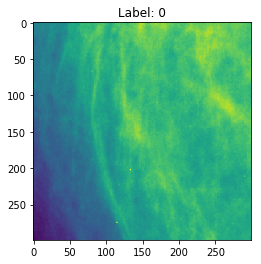

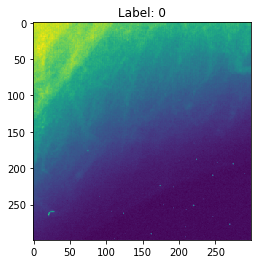

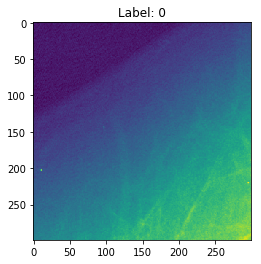

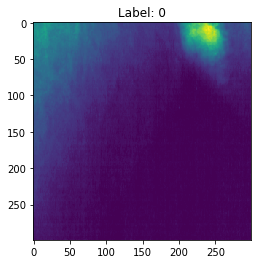

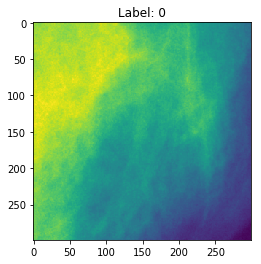

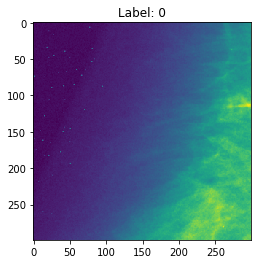

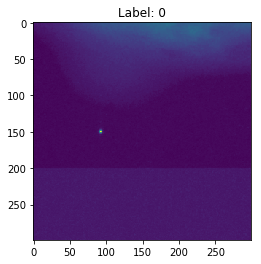

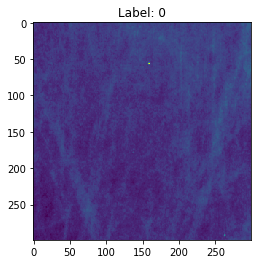

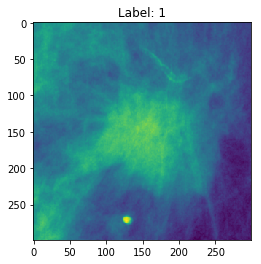

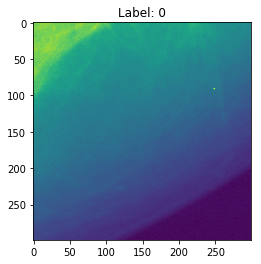

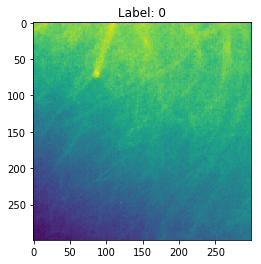

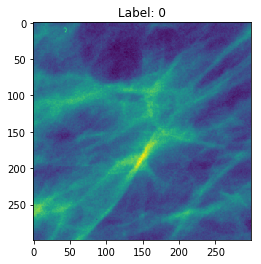

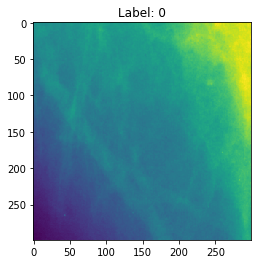

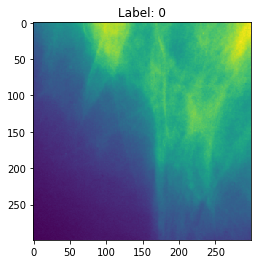

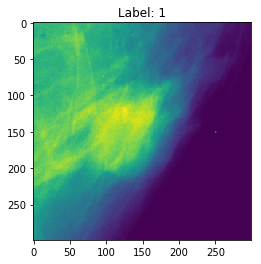

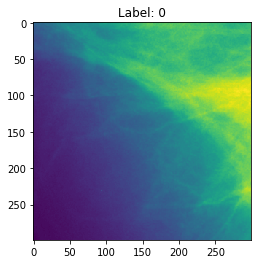

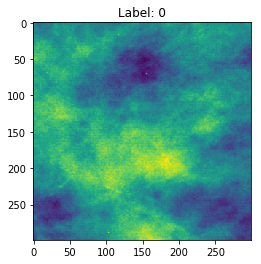

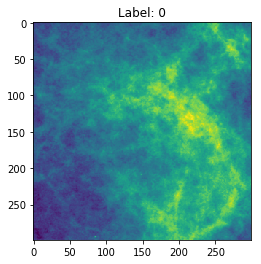

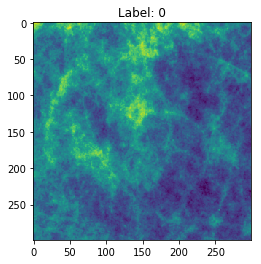

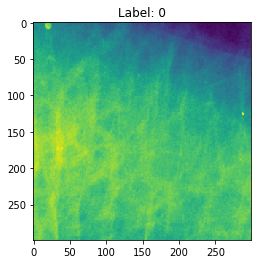

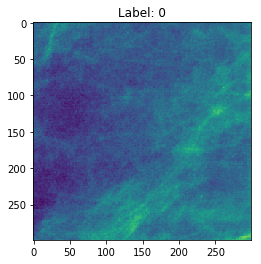

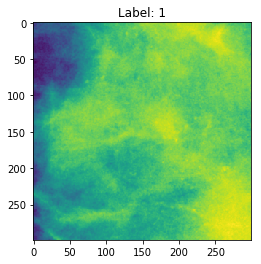

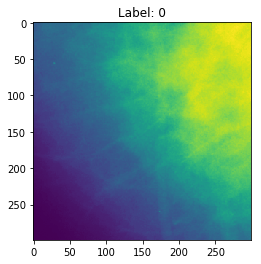

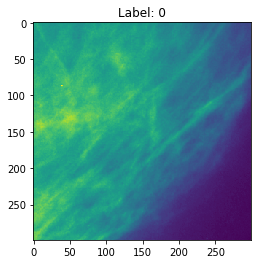

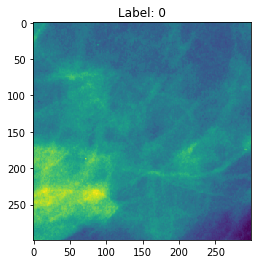

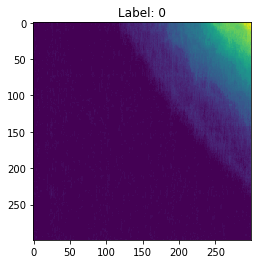

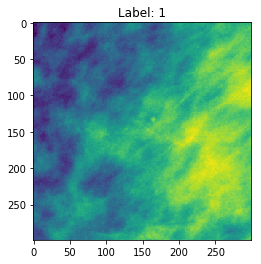

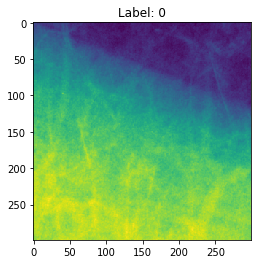

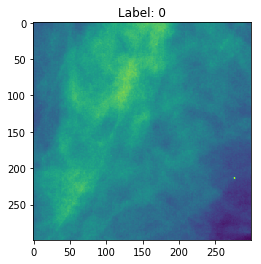

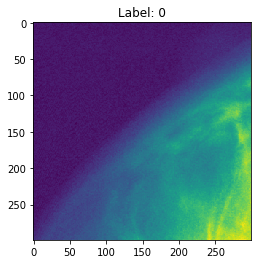

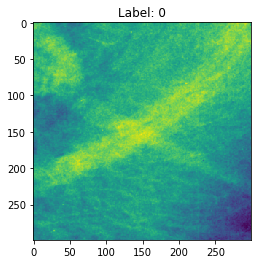

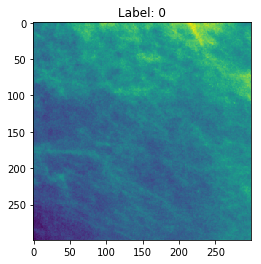

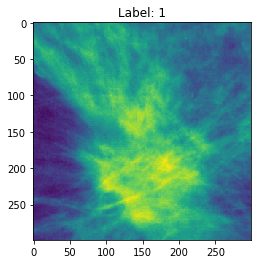

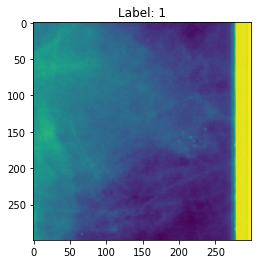

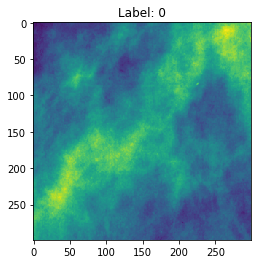

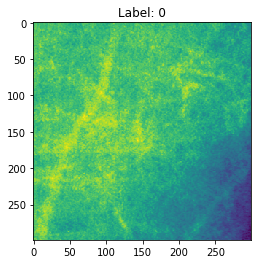

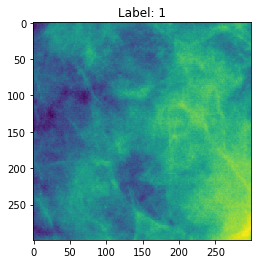

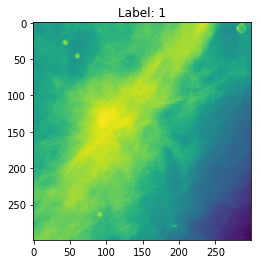

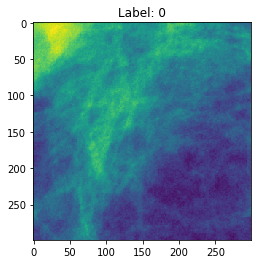

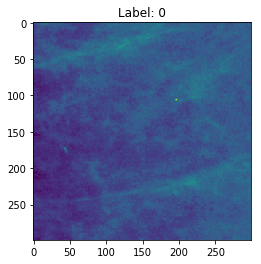

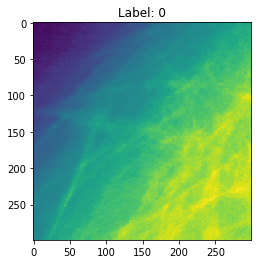

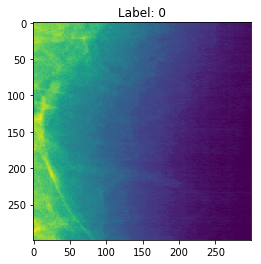

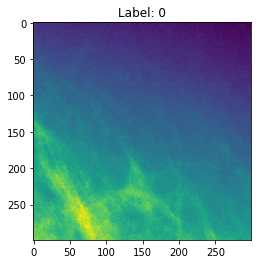

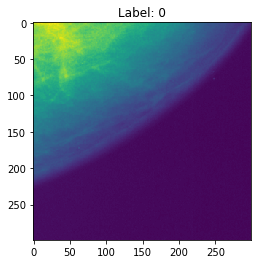

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for j in range(5):
        la_b, im_b = sess.run([labels_batch, images_batch])
        
        for i in range(10):
            plt.imshow(im_b[i].reshape([299,299]))
            plt.title("Label: " + str(la_b[i]))
            plt.show()
            
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)